## Per Category

In [7]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [8]:
n = 500 #Size of dataset, in rows.
gender_data = []
income_data = []

for i in range(n):
    gender_data.append( np.random.choice( gender ) )
    income_data.append( np.random.choice( income ) )


In [9]:
height = 130 + 30 * np.random.randn( n )
weight = 65 + 25 * np.random.randn( n )
age = 30 + 12 * np.random.randn( n )
income = 18000 + 3500 * np.random.randn( n )

In [10]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    }
)

In [11]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,128.503274,51.635580,46.481995,17306.734084
1,Male,Poor,120.007009,42.789077,17.924604,16668.358947
2,Male,Middle Class,134.178189,100.533650,8.077287,21392.736376
3,Female,Poor,122.999286,50.464509,60.556385,18544.431510
4,Female,Middle Class,173.162080,73.714105,28.107580,23788.471025


## Data Grouping

In [14]:
grouped_gender = data.groupby( "Gender" )

In [21]:
grouped_gender.groups

{'Female': Int64Index([  0,   3,   4,   5,  15,  24,  26,  27,  28,  29,
             ...
             481, 483, 484, 486, 491, 493, 494, 497, 498, 499],
            dtype='int64', length=237),
 'Male': Int64Index([  1,   2,   6,   7,   8,   9,  10,  11,  12,  13,
             ...
             480, 482, 485, 487, 488, 489, 490, 492, 495, 496],
            dtype='int64', length=263)}

In [19]:
for names, groups in grouped_gender:
    print( names )
    print( groups )

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female    Middle Class  128.503274   51.635580  46.481995  17306.734084
3    Female            Poor  122.999286   50.464509  60.556385  18544.431510
4    Female    Middle Class  173.162080   73.714105  28.107580  23788.471025
5    Female    Middle Class  148.253501   65.478541  38.392317  17198.556008
15   Female    Middle Class  146.201128   77.630169   6.313549  24078.045912
24   Female            Rich  107.295181   98.516158  46.549059  16665.566170
26   Female            Poor  156.574735   81.332638  28.778429  24272.497291
27   Female            Rich   98.798542   87.737364  22.593523  22127.051074
28   Female            Rich   93.719155   55.283218  33.665680  26035.536507
29   Female            Rich  130.504347   65.097707  37.954712  23067.033484
30   Female    Middle Class  129.702076  104.025273   8.114336  16387.187104
31   Female    Middle Class  157.221225   62.228646  23.653946  14361

In [23]:
grouped_gender.get_group( "Female" ).head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,128.503274,51.635580,46.481995,17306.734084
3,Female,Poor,122.999286,50.464509,60.556385,18544.431510
4,Female,Middle Class,173.162080,73.714105,28.107580,23788.471025
5,Female,Middle Class,148.253501,65.478541,38.392317,17198.556008
15,Female,Middle Class,146.201128,77.630169,6.313549,24078.045912


In [27]:
double_group = data.groupby( ["Gender", "Economic Status"] )

for names, groups in double_group:
    print( names )
    print( groups )

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
0    Female    Middle Class  128.503274   51.635580  46.481995  17306.734084
4    Female    Middle Class  173.162080   73.714105  28.107580  23788.471025
5    Female    Middle Class  148.253501   65.478541  38.392317  17198.556008
15   Female    Middle Class  146.201128   77.630169   6.313549  24078.045912
30   Female    Middle Class  129.702076  104.025273   8.114336  16387.187104
31   Female    Middle Class  157.221225   62.228646  23.653946  14361.174875
33   Female    Middle Class   59.243071   91.165127  27.397388  20403.945011
35   Female    Middle Class  127.102510   12.560427  21.805883  11022.760399
43   Female    Middle Class  137.037455   27.623683  30.561524  17786.769808
63   Female    Middle Class  142.473447   72.101905  24.664909  14906.094751
65   Female    Middle Class   87.962961   83.862740  49.204654  18292.294880
67   Female    Middle Class  122.895494   79.6019

## Operations on Grouped Data

In [28]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     10733.756353  5747.805360  2564.481104  1.547010e+06
       Poor              9899.159725  5450.136714  2365.249473  1.353781e+06
       Rich              9690.598351  5079.232403  2336.896858  1.351324e+06
Male   Middle Class     11935.899090  5856.310577  2709.197978  1.657766e+06
       Poor             10598.010441  5592.932646  2526.118492  1.499354e+06
       Rich             11274.824867  5639.971642  2507.741909  1.630123e+06

In [29]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     126.279487  67.621240  30.170366  18200.116596
       Poor             128.560516  70.780996  30.717526  17581.569895
       Rich             129.207978  67.723099  31.158625  18017.650828
Male   Middle Class     129.738034  63.655550  29.447804  18019.195077
       Poor             127.686873  67.384731  30.435163  18064.502541
       Rich             128.123010  64.090587  28.497067  18524.119481

In [30]:
double_group.size()

Gender  Economic Status
Female  Middle Class       85
        Poor               77
        Rich               75
Male    Middle Class       92
        Poor               83
        Rich               88
dtype: int64

In [32]:
double_group.describe()

Age                                              \
                       count       mean        std        min        25%   
Gender Economic Status                                                     
Female Middle Class     85.0  30.170366  12.020134   1.415900  23.653946   
       Poor             77.0  30.717526  12.881551   4.002788  23.510514   
       Rich             75.0  31.158625  10.820566   7.761732  24.497478   
Male   Middle Class     92.0  29.447804  11.793618  -9.862627  21.804719   
       Poor             83.0  30.435163  11.741408  10.051451  22.898715   
       Rich             88.0  28.497067  12.928967  -7.947360  21.388774   

                                                        Height              \
                              50%        75%        max  count        mean   
Gender Economic Status                                                       
Female Middle Class     30.399331  37.619072  56.779146   85.0  126.279487   
       Poor             30.195378  38.330362  69.780165   77.0  128.560516   
       Rich             31.044904  37.889441  57.942245   75.0  129.207978   
Male   Middle Class     30.076372  38.501898  54.120739   92.0  129.738034   
       Poor             29.941421  37.352082  61.671331   83.0  127.686873   
       Rich             30.683352  37.764405  52.848671   88.0  128.123010   

                           ...            Income               Weight  \
                           ...               75%           max  count   
Gender Economic Status     ...                                          
Female Middle Class        ...      20673.235086  24436.197354   85.0   
       Poor                ...      19734.845204  27135.049708   77.0   
       Rich                ...      20494.793669  26323.979528   75.0   
Male   Middle Class        ...      19924.641128  28170.446042   92.0   
       Poor                ...      20952.154453  27426.079270   83.0   
       Rich                ...      21183.452698  28071.428648   88.0   

                                                                               \
                             mean        std        min        25%        50%   
Gender Economic Status                                                          
Female Middle Class     67.621240  25.020777  12.560427  51.478065  67.536233   
       Poor             70.780996  27.050680   8.107697  52.283579  72.142375   
       Rich             67.723099  22.461888   5.397978  53.624605  71.321140   
Male   Middle Class     63.655550  26.074932   4.480752  43.040996  64.446162   
       Poor             67.384731  25.438082  -0.212359  48.919206  67.029482   
       Rich             64.090587  27.513412  -6.379433  44.293814  65.171471   

                                               
                              75%         max  
Gender Economic Status                         
Female Middle Class     82.240284  146.251506  
       Poor             89.656029  136.167859  
       Rich             82.668928  114.732524  
Male   Middle Class     83.039158  120.742720  
       Poor             81.679158  134.571494  
       Rich             83.229731  154.339627  

[6 rows x 32 columns]

In [34]:
grouped_income = double_group["Income"]
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      85.0  18200.116596  3342.185638   8700.606600   
       Poor              77.0  17581.569895  3690.272035   8276.976513   
       Rich              75.0  18017.650828  3952.499673   8627.097060   
Male   Middle Class      92.0  18019.195077  3130.838212   8144.199020   
       Poor              83.0  18064.502541  3519.693426  11444.208435   
       Rich              88.0  18524.119481  4094.746458   9492.196634   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     16095.151785  18284.619190  20673.235086  24436.197354  
       Poor             15214.344614  17927.888749  19734.845204  27135.049708  
       Rich             15812.012080  18266.769083  20494.793669  26323.979528  
Male   Middle Class     16414.334555  18281.466604  19924.641128  28170.446042  
       Poor             15298.849154  17936.992528  20952.154453  27426.079270  
       Rich             15527.467547  18643.716295  21183.452698  28071.428648

In [35]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.547010e+06  30.170366  31.007568
       Poor             1.353781e+06  30.717526  30.855245
       Rich             1.351324e+06  31.158625  29.524038
Male   Middle Class     1.657766e+06  29.447804  34.178804
       Poor             1.499354e+06  30.435163  26.992787
       Rich             1.630123e+06  28.497067  31.867597

In [39]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:( np.mean(h)/np.std(h)) #h is a var I decided to call it h, for Height, instead of x. Lambda is a param for the aggregate method.
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.170366  4.096707
       Poor             30.717526  4.193891
       Rich             31.158625  4.405836
Male   Middle Class     29.447804  3.816662
       Poor             30.435163  4.759164
       Rich             28.497067  4.043519

In [41]:
double_group.aggregate([ np.sum, np.mean, np.std ]) #Applying calculations to all columns simultaneously

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     10733.756353  126.279487  31.007568  5747.805360   
       Poor              9899.159725  128.560516  30.855245  5450.136714   
       Rich              9690.598351  129.207978  29.524038  5079.232403   
Male   Middle Class     11935.899090  129.738034  34.178804  5856.310577   
       Poor             10598.010441  127.686873  26.992787  5592.932646   
       Rich             11274.824867  128.123010  31.867597  5639.971642   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     67.621240  25.020777  2564.481104  30.170366   
       Poor             70.780996  27.050680  2365.249473  30.717526   
       Rich             67.723099  22.461888  2336.896858  31.158625   
Male   Middle Class     63.655550  26.074932  2709.197978  29.447804   
       Poor             67.384731  25.438082  2526.118492  30.435163   
       Rich             64.090587  27.513412  2507.741909  28.497067   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.020134  1.547010e+06  18200.116596  3342.185638  
       Poor             12.881551  1.353781e+06  17581.569895  3690.272035  
       Rich             10.820566  1.351324e+06  18017.650828  3952.499673  
Male   Middle Class     11.793618  1.657766e+06  18019.195077  3130.838212  
       Poor             11.741408  1.499354e+06  18064.502541  3519.693426  
       Rich             12.928967  1.630123e+06  18524.119481  4094.746458

In [43]:
double_group.aggregate( lambda x:( np.mean(x)/np.std(x)) )

Height    Weight       Age    Income
Gender Economic Status                                        
Female Middle Class     4.096707  2.718643  2.524882  5.477891
       Poor             4.193891  2.633765  2.400251  4.795544
       Rich             4.405836  3.035326  2.898966  4.589243
Male   Middle Class     3.816662  2.454632  2.510609  5.786927
       Poor             4.759164  2.665074  2.607880  5.163608
       Rich             4.043519  2.342780  2.216757  4.549800

## Data Filtering

In [48]:
double_group["Age"].filter( lambda x: x.sum() > 2400 )#Show elements which age sum is larger than 2400.

0      46.481995
1      17.924604
2       8.077287
4      28.107580
5      38.392317
6      16.902791
7      31.898392
8      30.737657
9      16.178011
10     25.039430
11     20.945039
12     45.777218
13     44.378085
14     34.437676
15      6.313549
16     30.822340
17     38.540669
18     32.555509
19     23.084225
20     24.038399
21     48.649147
22     15.452319
23     29.186131
25     50.167800
30      8.114336
31     23.653946
33     27.397388
34     30.850614
35     21.805883
37     43.759867
         ...    
457    27.213279
458    15.074956
459    30.206430
460    37.619072
462    42.515077
463    18.342509
464    10.781634
465    35.888786
466    36.921441
467    31.592315
468    25.587643
469    21.570786
470    43.009835
474    55.400537
475    32.656376
476    33.688310
477    54.120739
478    33.204429
479    43.329081
480    35.245360
482    25.162987
485    39.952553
487    10.444751
488    14.014331
489    14.681282
490    51.345956
492    40.186367
495    17.8561

## Variable Transformation

In [64]:
zscore = lambda x: ( x - x.mean()/x.std() ) #This returns a DataFrame
z_group = double_group.transform( zscore )

In [8]:
import matplotlib.pyplot as plt

(array([  2.,  11.,  33.,  72., 125., 129.,  80.,  37.,  10.,   1.]),
 array([-12.35955451,  -4.38404393,   3.59146665,  11.56697722,
         19.5424878 ,  27.51799838,  35.49350896,  43.46901953,
         51.44453011,  59.42004069,  67.39555127]),
 <a list of 10 Patch objects>)

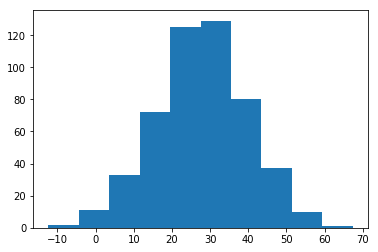

In [63]:
plt.hist( z_group["Age"] )

## Useful Operations

In [65]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,128.503274,51.635580,46.481995,17306.734084
1,Male,Poor,120.007009,42.789077,17.924604,16668.358947
2,Male,Middle Class,134.178189,100.533650,8.077287,21392.736376
3,Female,Poor,122.999286,50.464509,60.556385,18544.431510
7,Male,Rich,121.740835,113.389812,31.898392,18906.666854
24,Female,Rich,107.295181,98.516158,46.549059,16665.566170


In [66]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
492,Male,Middle Class,161.268313,50.558691,40.186367,20894.779390
495,Male,Poor,154.095193,46.085528,17.856160,16795.507267
496,Male,Rich,110.430820,91.832995,14.768861,20095.462318
497,Female,Rich,118.927732,90.780377,28.564044,15222.225633
498,Female,Poor,73.717487,127.819323,8.070644,15670.654442
499,Female,Middle Class,150.803611,93.644177,43.096285,17637.100162


In [70]:
double_group.nth( 25 ) #Displays 25th element of each combination

Age      Height        Income     Weight
Gender Economic Status                                                
Female Middle Class     38.077174  140.646492  15307.710463  38.500737
       Poor              4.550788  114.056396  17626.592558  36.886063
       Rich              9.763351  118.109603  17113.144071  59.041063
Male   Middle Class     29.990298  185.831423  19683.681350  63.018019
       Poor             35.224000  147.219293  20780.380660  75.684363
       Rich              9.483377  143.668313  26406.624291  88.441808

In [71]:
data_sorted = data.sort_values( ["Age", "Income"] )

In [72]:
data_sorted.head( 10 )

,Gender,Economic Status,Height,Weight,Age,Income
154,Male,Middle Class,172.130186,57.748302,-9.862627,17693.527827
132,Male,Rich,107.687414,46.562909,-7.947360,17081.313333
110,Male,Rich,163.498912,65.995066,-1.710490,20152.217952
225,Male,Rich,128.715610,72.303505,-1.043731,10641.076704
262,Male,Rich,156.070786,20.732504,1.348406,19108.549557
178,Female,Middle Class,63.735650,70.586481,1.415900,22336.471026
62,Male,Rich,179.800116,37.117006,2.203941,11068.384052
104,Female,Middle Class,108.616494,49.885908,2.707432,20845.331770
452,Female,Poor,164.153826,114.717035,4.002788,11161.268626
179,Female,Poor,114.056396,36.886063,4.550788,17626.592558


In [75]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
154,Male,Middle Class,172.130186,57.748302,-9.862627,17693.527827
132,Male,Rich,107.687414,46.562909,-7.947360,17081.313333
110,Male,Rich,163.498912,65.995066,-1.710490,20152.217952
225,Male,Rich,128.715610,72.303505,-1.043731,10641.076704
262,Male,Rich,156.070786,20.732504,1.348406,19108.549557
178,Female,Middle Class,63.735650,70.586481,1.415900,22336.471026
104,Female,Middle Class,108.616494,49.885908,2.707432,20845.331770
452,Female,Poor,164.153826,114.717035,4.002788,11161.268626
179,Female,Poor,114.056396,36.886063,4.550788,17626.592558
51,Female,Poor,131.096628,97.023219,5.680056,22356.623278


## Training Dataset and Testing Dataset

In [4]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv( "../datasets/customer-churn-model/Customer Churn Model.txt" )
len(data)

3333

## Divide using Normal Distribution

In [5]:
a = np.random.randn( len(data) )

(array([  4.,  32., 185., 590., 893., 892., 534., 166.,  34.,   3.]),
 array([-3.6876416 , -2.94458962, -2.20153764, -1.45848567, -0.71543369,
         0.02761829,  0.77067026,  1.51372224,  2.25677421,  2.99982619,
         3.74287817]),
 <a list of 10 Patch objects>)

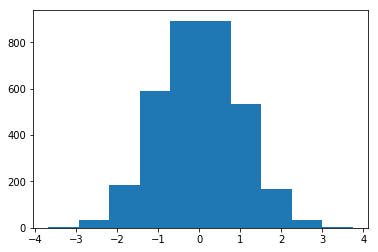

In [9]:
plt.hist(a)

In [14]:
check = (a < 0.8) # 80% of the data will go to training, and 20% for testing.
check

array([ True,  True,  True, ..., False, False,  True])

(array([ 712.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2621.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

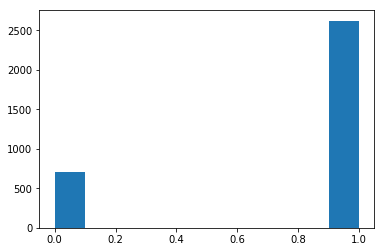

In [12]:
plt.hist( check )

In [13]:
training = data[check]
testing = data[~check]

## sklearn library

In [15]:
from sklearn.cross_validation import train_test_split

In [17]:
train, test = train_test_split( data, test_size=0.2 )

In [19]:
len( train )

2666

In [20]:
len( test )

667

## Using Shuffle Method

In [24]:
import sklearn

In [25]:
sklearn.utils.shuffle( data )

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1235,AZ,163,510,354-4568,no,no,0,178.7,56,30.38,...,79,18.33,152.7,84,6.87,10.6,2,2.86,4,False.
564,CT,66,415,417-7973,no,yes,29,229.4,104,39.00,...,84,21.88,231.5,119,10.42,8.0,1,2.16,2,False.
786,SD,85,408,358-5826,no,no,0,209.8,82,35.67,...,94,16.53,200.4,85,9.02,11.3,3,3.05,0,False.
3264,RI,89,415,414-1537,no,yes,24,97.8,98,16.63,...,67,17.61,214.5,126,9.65,5.9,2,1.59,0,False.
1021,WV,67,408,406-6708,no,no,0,167.8,91,28.53,...,69,14.25,110.3,71,4.96,8.4,12,2.27,1,False.
1906,DC,91,415,384-7873,no,yes,39,169.8,105,28.87,...,116,5.54,144.4,92,6.50,10.9,4,2.94,1,False.
556,NJ,123,408,336-1749,no,no,0,159.5,77,27.12,...,92,25.82,226.9,120,10.21,12.0,4,3.24,0,False.
1339,WA,90,415,374-9576,yes,no,0,148.2,96,25.19,...,111,18.73,134.2,97,6.04,9.2,1,2.48,4,True.
753,TX,90,415,399-4413,no,no,0,109.6,88,18.63,...,108,11.70,159.7,121,7.19,11.0,5,2.97,2,False.
2937,KY,96,415,353-3223,no,yes,40,108.6,90,18.46,...,154,17.54,126.3,118,5.68,13.4,4,3.62,0,False.


In [29]:
cut_id = int( 0.75*len(data) )
train_data = data[:cut_id]
test_data = data[cut_id+1:]